# Machine Learning 
## Final project

 Team members:
+ Oscar Ochoa
+ Victor Manuel Romo
+ Luis Cabello
+ Ana Sepúlveda
+ Enrique Villar

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl;
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


%matplotlib inline

import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import library from my src folder    
from src.helpers import identify_highly_correlated_features, identify_low_variance_features, identify_missing_data, feature_importance_plot, normalize


In [157]:
songs_data = pd.read_pickle("../data/songs_data_cleaned.pkl")

## Feature Engineering

### Label Encoding

The Target or "genre" will be encoded

In [158]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'genre'
print(songs_data['genre'].unique())
songs_data['genre']= label_encoder.fit_transform(songs_data['genre'])

songs_data['genre'].unique()

['edm' 'rock' 'rap' 'latin' 'r&b' 'pop']


array([0, 5, 4, 1, 3, 2])

Note: The encoded genre target results with the following values:

- 0: 'edm'
- 1: 'latin'
- 2: 'pop'
- 3: 'r&b' 
- 4: 'rap'
- 5: 'rock'


### Normalization

In [159]:
songs_data = normalize(songs_data, "genre")

array([[<AxesSubplot: title={'center': 'track_popularity'}>,
        <AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>,
        <AxesSubplot: title={'center': 'key'}>],
       [<AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'mode'}>,
        <AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'acousticness'}>],
       [<AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'valence'}>,
        <AxesSubplot: title={'center': 'tempo'}>],
       [<AxesSubplot: title={'center': 'duration_ms'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

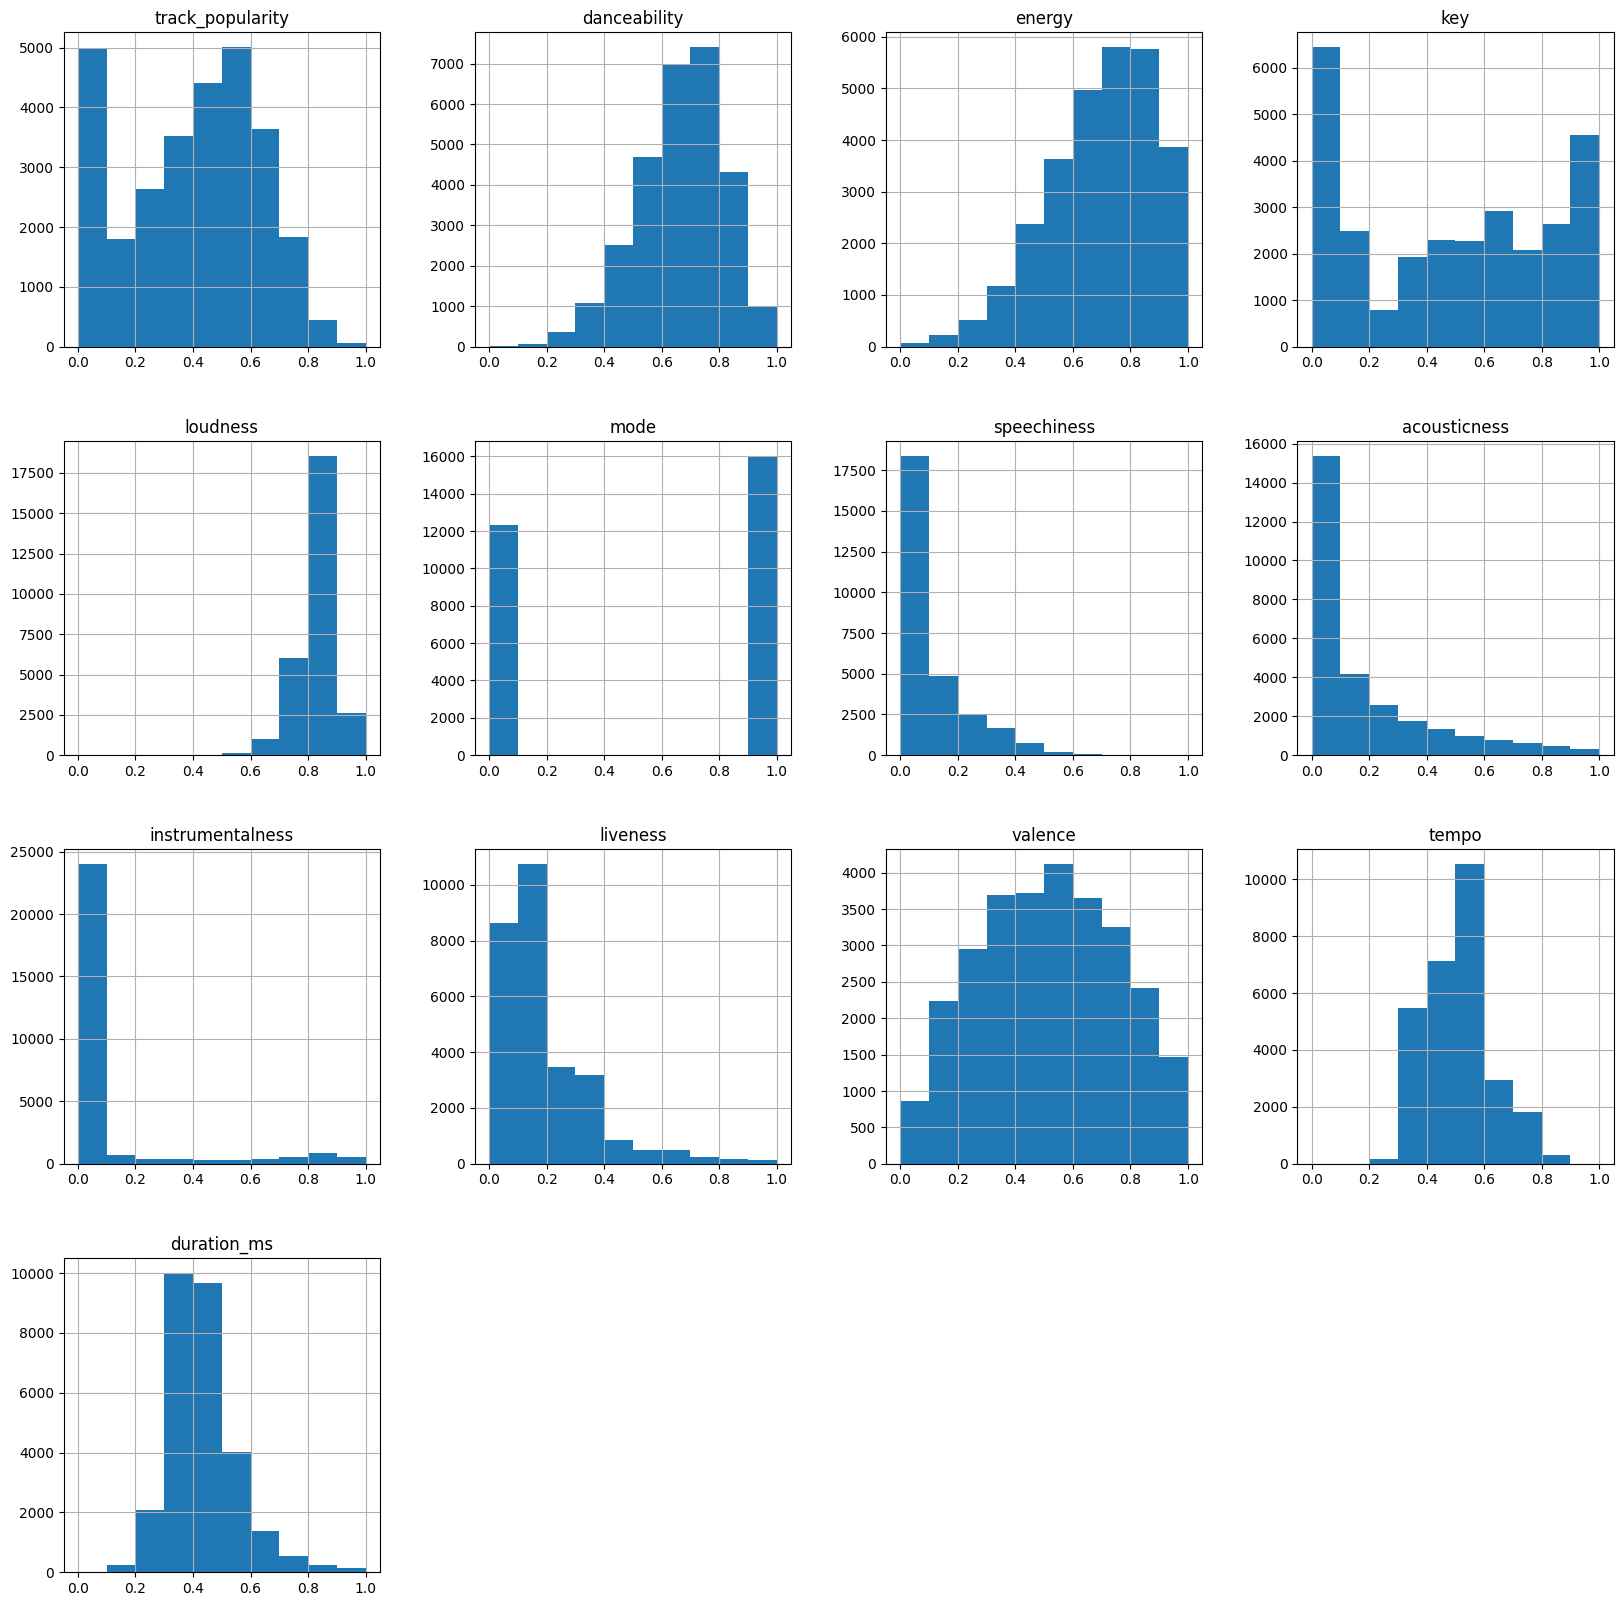

In [160]:
# Histograms of numerical variables

plt.rcParams["figure.figsize"] = (20,20)

songs_data.drop(["genre"], axis=1).hist()

<AxesSubplot: >

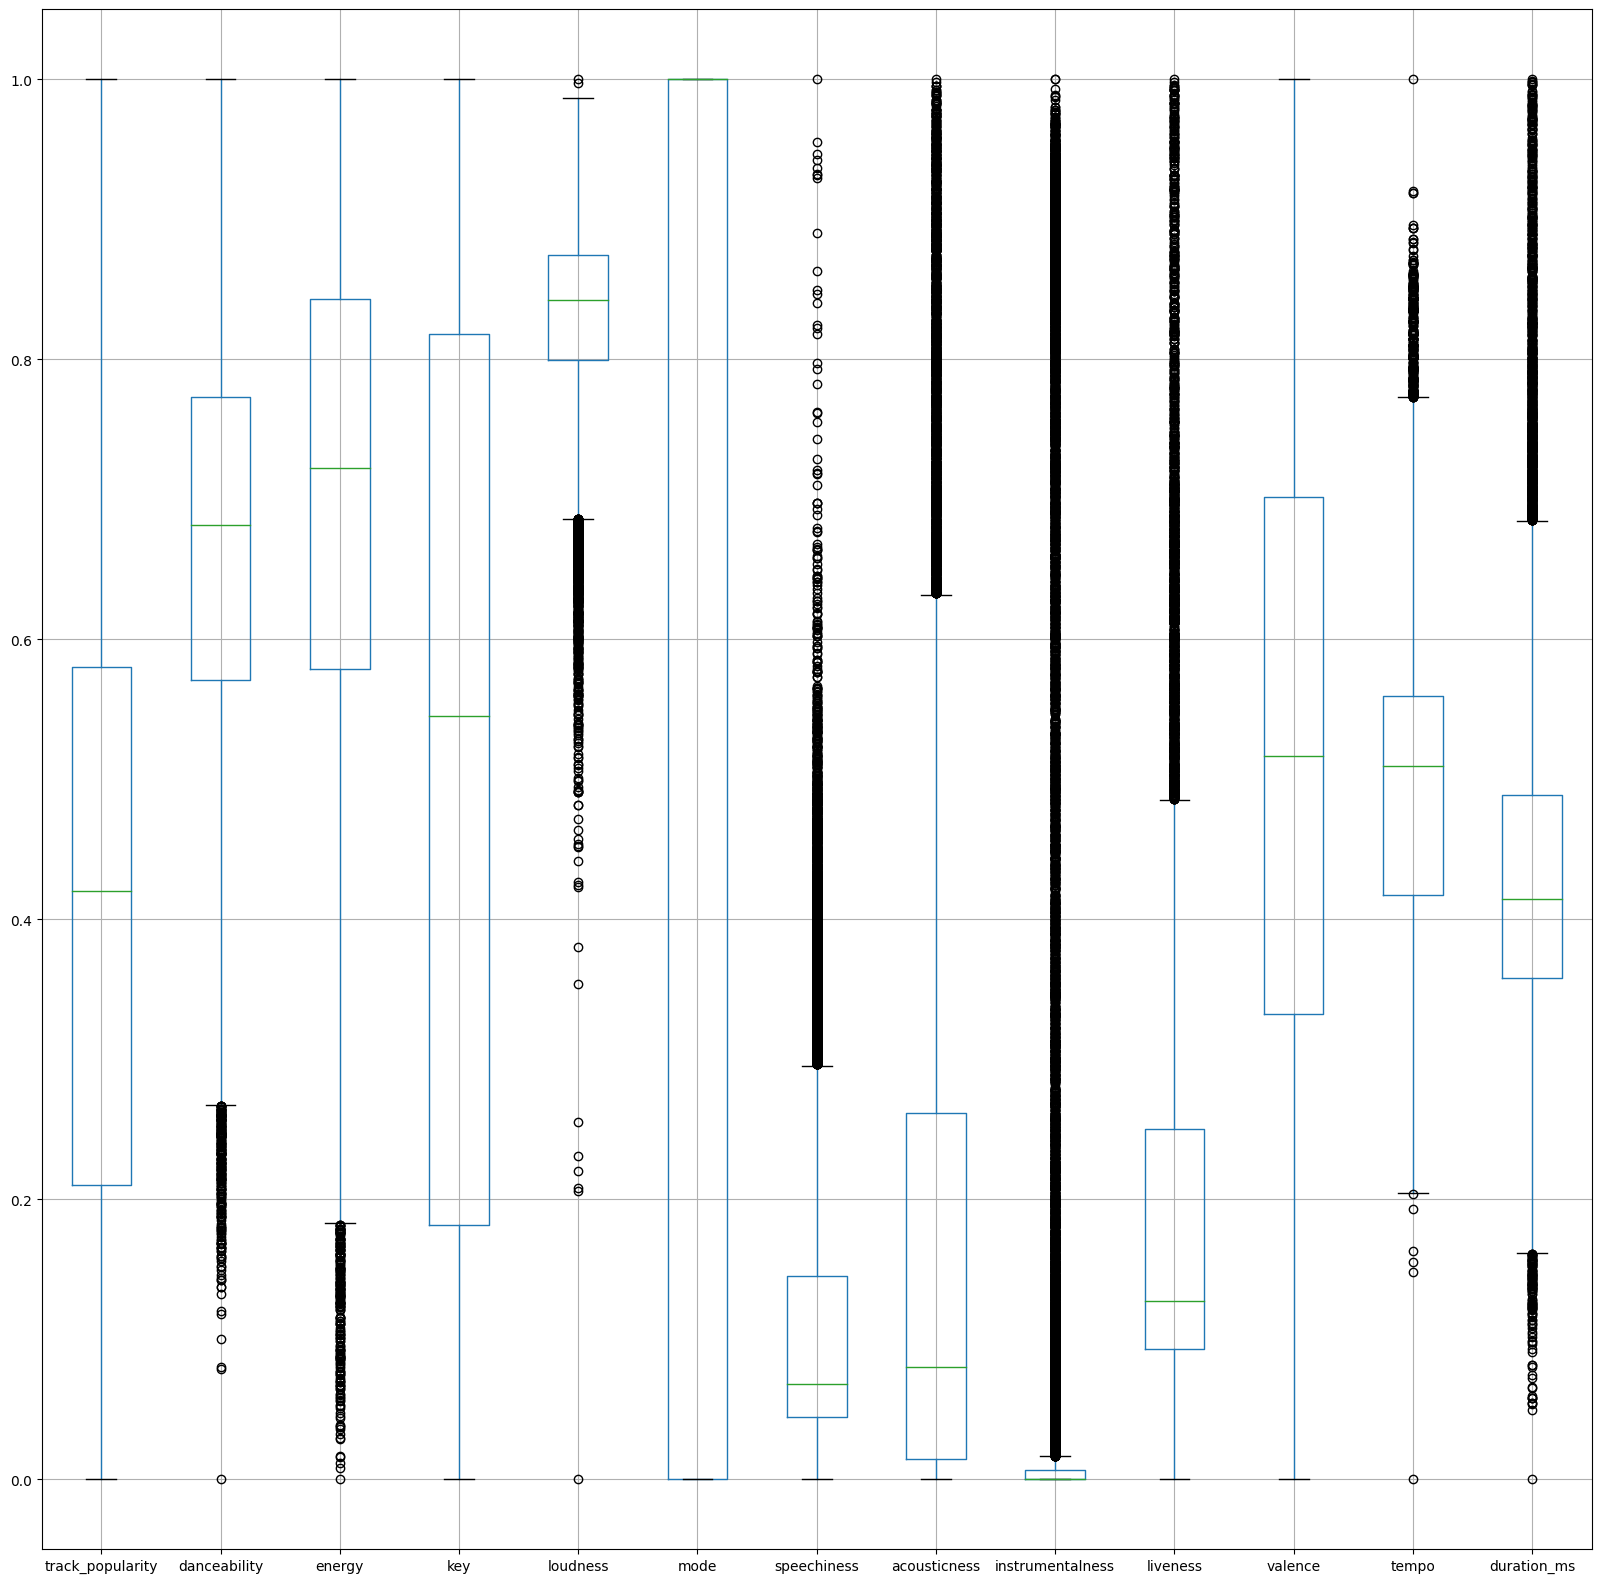

In [161]:
plt.rcParams["figure.figsize"] = (20,20)
songs_data.drop(["genre"], axis=1).boxplot()

### Logaritmic transform

c:\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='loudness', ylabel='Count'>

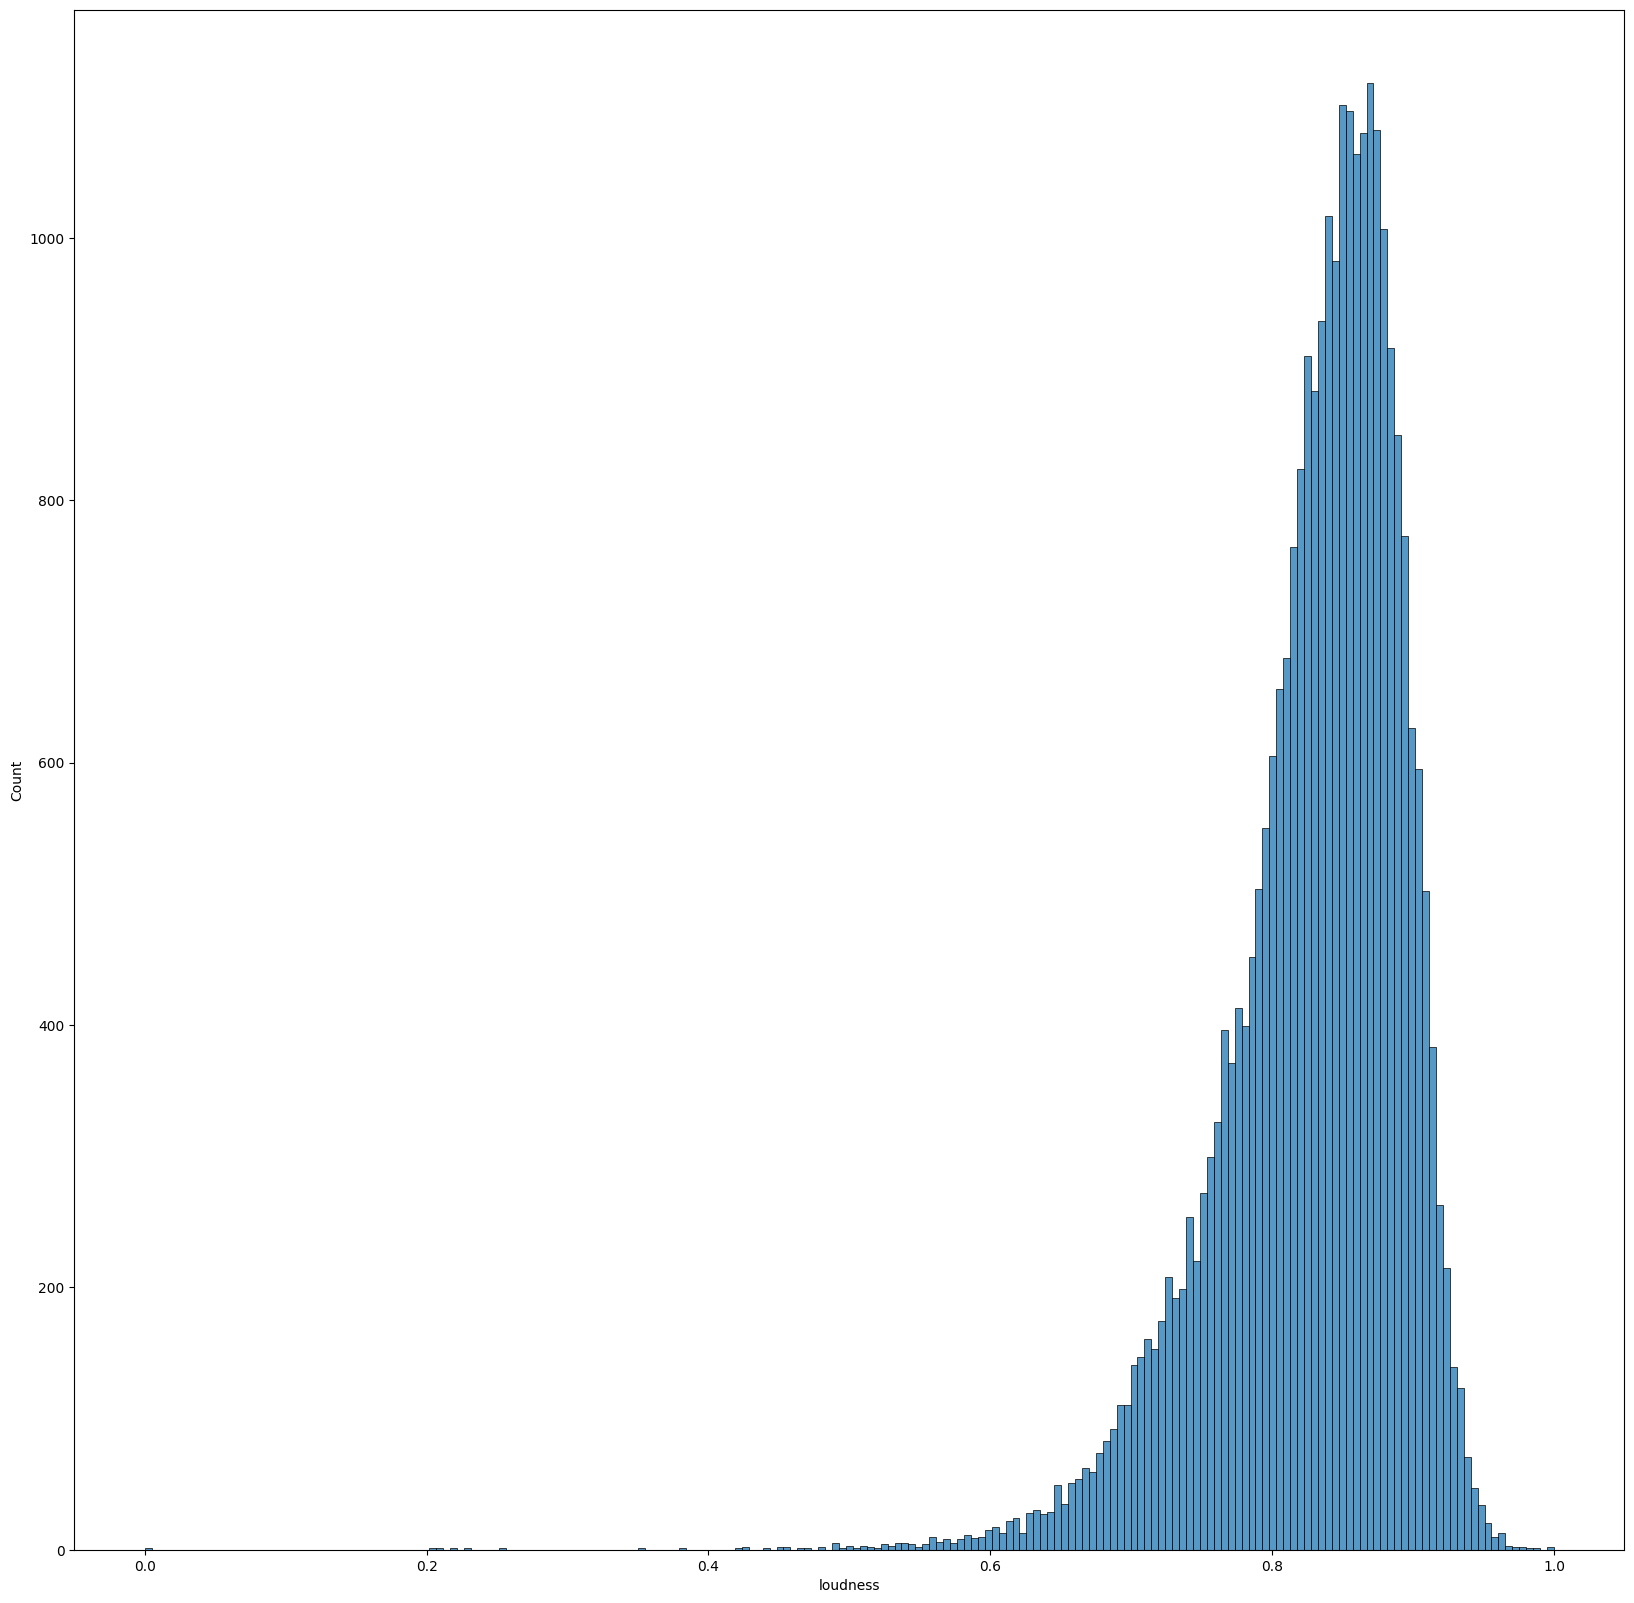

In [162]:
songs_data['speechiness'] = np.log(songs_data['speechiness'])
songs_data['acousticness'] = np.cbrt(songs_data['acousticness'])
songs_data['liveness'] = np.log(songs_data['liveness'])

sns.histplot(data=songs_data.loudness)

In [163]:
songs_data.to_pickle("../data/songs_data_final.pkl")